In this occasion, we will process COVID-19 data in Indonesia. This data is taken from the kawalcovid19 website.
The data is extracted partially from July 1st, 2021 - November 14th, 2021

1. Business Understanding / Question

In this instance, we aim to comprehend the progression of new COVID-19 cases from November 15, 2021, to December 14, 2021, in Indonesia. Assuming the absence of sudden surges or the introduction of new variants, can the number of cases experience a decline, and to what extent might this decline occur?

2. Data Collection

Here, we will attempt to gather the required data. Fortunately, we already possess the data and merely need to make the necessary calls

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/covid_indonesia_2.csv')
df.head()

,Tanggal,Kasus_harian,Total_kasus,Kasus_aktif,Sembuh_baru,Sembuh,Meninggal_baru,Meninggal_Dunia
0,2021-07-01,24836,2203108,253826,9874,1890287,504,58995
1,2021-07-02,25830,2228938,267539,11578,1901865,539,59534
2,2021-07-03,27913,2256851,281677,13282,1915147,493,60027
3,2021-07-04,27233,2284084,295228,13127,1928274,555,60582
4,2021-07-05,29745,2313829,309999,14416,1942690,558,61140


2. Data Preparation

In this step, we will prepare the necessary data. We will be utilizing two columns for this occasion: total cases and date. First, let's take a closer look at the details of our dataset.

In [ ]:
#tuliskan kode disini
df.describe()

,Kasus_harian,Total_kasus,Kasus_aktif,Sembuh_baru,Sembuh,Meninggal_baru,Meninggal_Dunia
count,137.000000,1.370000e+02,137.000000,137.000000,1.370000e+02,137.000000,137.00000
mean,15128.343066,3.800636e+06,212836.240876,16188.065693,3.467221e+06,621.664234,120578.20438
std,16758.477055,6.121355e+05,201927.468029,15064.380154,7.427454e+05,614.988956,28539.47019
min,244.000000,2.203108e+06,9018.000000,451.000000,1.890287e+06,11.000000,58995.00000
25%,1053.000000,3.532567e+06,22541.000000,1946.000000,2.907920e+06,50.000000,100636.00000
50%,5436.000000,4.140634e+06,138630.000000,12474.000000,3.864848e+06,493.000000,137156.00000
75%,29745.000000,4.228552e+06,380797.000000,29794.000000,4.063295e+06,1128.000000,142716.00000
max,56757.000000,4.250855e+06,574135.000000,48832.000000,4.098178e+06,2069.000000,143659.00000


Next, we will examine the data types of all columns in the dataset.

In [ ]:
#tuliskan kode disini
print(df.dtypes)

Tanggal            object
Kasus_harian        int64
Total_kasus         int64
Kasus_aktif         int64
Sembuh_baru         int64
Sembuh              int64
Meninggal_baru      int64
Meninggal_Dunia     int64
dtype: object


Since we will be using the 'date' column as time-series and 'daily cases' as input, let's focus on these two columns.

In the daily cases details, we can observe a significant difference between the maximum and minimum values, with 50% of the data hovering around 5000. This is quite distant from the mean of around 15000. Hence, we need to perform normalization on this column. Additionally, since our system works with numeric data, we will convert the 'date' column into numeric format.

In [ ]:
# In this column, we will carry out a transformation and add a new column to our dataframe.
# We will name this new column 'cases_norm',
# which will contain the normalized data using logarithmic transformation.


df["cases_norm"] = np.log(df['Kasus_harian'])
df



,Tanggal,Kasus_harian,Total_kasus,Kasus_aktif,Sembuh_baru,Sembuh,Meninggal_baru,Meninggal_Dunia,cases_norm
0,2021-07-01,24836,2203108,253826,9874,1890287,504,58995,10.120049
1,2021-07-02,25830,2228938,267539,11578,1901865,539,59534,10.159292
2,2021-07-03,27913,2256851,281677,13282,1915147,493,60027,10.236848
3,2021-07-04,27233,2284084,295228,13127,1928274,555,60582,10.212185
4,2021-07-05,29745,2313829,309999,14416,1942690,558,61140,10.300416
...,...,...,...,...,...,...,...,...,...
132,2021-11-10,480,4249323,9537,531,4096194,14,143592,6.173786
133,2021-11-11,435,4249758,9486,470,4096664,16,143608,6.075346
134,2021-11-12,399,4250157,9305,560,4097224,20,143628,5.988961
135,2021-11-13,359,4250516,9198,451,4097675,15,143643,5.883322


After this, we will convert the 'date' column into a numeric column, using July 1, 2021 as the base. This means we will transform:

2021-07-01 into 0,

2021-07-02 into 1,

and so on.

In [ ]:
# By utilizing the to_datetime method in pandas, please convert the row index 0 from the 'date' column and store it in a variable named default_date.
# This value will be used as a subtractor for other dates.

default_date = pd.to_datetime(df.iloc[0]['Tanggal'])
print(f'nilai default_date adalah : {default_date}')

nilai default_date adalah : 2021-07-01 00:00:00


Now we will create a function that will convert all dates in the column into numeric values based on July 1, 2021.

In [ ]:
# On this occasion, we will utilize apply() and lambda() functions.
# We will create a new column named 'days' and then display the updated dataframe.

df['days'] = df['Tanggal'].apply(lambda x: pd.Timedelta(pd.to_datetime(x) - default_date).days)
df

,Tanggal,Kasus_harian,Total_kasus,Kasus_aktif,Sembuh_baru,Sembuh,Meninggal_baru,Meninggal_Dunia,cases_norm,days
0,2021-07-01,24836,2203108,253826,9874,1890287,504,58995,10.120049,0
1,2021-07-02,25830,2228938,267539,11578,1901865,539,59534,10.159292,1
2,2021-07-03,27913,2256851,281677,13282,1915147,493,60027,10.236848,2
3,2021-07-04,27233,2284084,295228,13127,1928274,555,60582,10.212185,3
4,2021-07-05,29745,2313829,309999,14416,1942690,558,61140,10.300416,4
...,...,...,...,...,...,...,...,...,...,...
132,2021-11-10,480,4249323,9537,531,4096194,14,143592,6.173786,132
133,2021-11-11,435,4249758,9486,470,4096664,16,143608,6.075346,133
134,2021-11-12,399,4250157,9305,560,4097224,20,143628,5.988961,134
135,2021-11-13,359,4250516,9198,451,4097675,15,143643,5.883322,135


The final step involves creating a copy of the data, including the 'cases_norm' and 'days' columns, into a new dataframe.

In [ ]:
# Fill in this cell with the new dataframe and display it.
data = df[['cases_norm', 'days']].copy()
data

,cases_norm,days
0,10.120049,0
1,10.159292,1
2,10.236848,2
3,10.212185,3
4,10.300416,4
...,...,...
132,6.173786,132
133,6.075346,133
134,5.988961,134
135,5.883322,135


4. Data Processing

Now we will process our data. There are two parts: the first involves model creation, and the second involves a simple evaluation.

In [ ]:
#pembuatan model
#Import/add all the required packages/libraries at the top cell (related to libraries).
#In this section, we will map 'days' to the x-axis and 'cases_norm' to the y-axis. Place these two columns into corresponding variables.
#Convert them into numpy arrays using np.array().
#Hint: Use .reshape((-1, 1)) on the x-axis while converting it to np.array to reshape the array dimensions.
#We will split the data into training and testing sets with a test_size of 0.2.

x = np.array(data['days']).reshape((-1, 1))
y = np.array(data['cases_norm'])

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size = 0.2)

print(f'dimensi dari X_train : {len(X_train)}')
print(f'dimensi dari y_train : {len(y_train)}')
print(f'dimensi dari X_test : {len(X_test)}')
print(f'dimensi dari y_test : {len(y_test)}')




dimensi dari X_train : 109
dimensi dari y_train : 109
dimensi dari X_test : 28
dimensi dari y_test : 28


Now we will create our model. We will use polynomial regression. The difference from linear regression lies in the step before setting it to our linear regression model. We will first transform the data into a polynomial form.

In [ ]:
'''Import the PolynomialFeatures module from sklearn.preprocessing and place it in the package/library cell.
Call the linear regression module from sklearn and place it in the package/library cell as well.
'''

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)

#setelah ini, di bawah, buatlah model linear regression pada seperti biasa.
#gunakan X_poly untuk menggantikan X_train pada sesi training model linear regression pasangkan dengan y_train

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)


LinearRegression()

Next, we will evaluate our model by making predictions from X_test and then comparing the results with y_test. Calculate the R-squared value.

In [ ]:
#First, let's predict the entire X_test data.
'''We will use poly_reg.fit_transform to transform our data into its polynomial form.
'''

poly_x_test = poly_reg.fit_transform(X_test)

#After that, create a variable y_pred using the predict method and display y_pred
y_pred = pol_reg.predict(poly_x_test)


In [ ]:
'''Evaluate our model using the following function.
Import metrics from sklearn and place it at the top cell.
'''
r2 = r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
R2 score is 0.9576332489268025


A value of 0.95 is considered good. Now, let's proceed to make predictions for our data. Remember, at the beginning, we wanted to predict data for the next 30 days starting from the last data. Create a numpy array from 137 to 166.

In [ ]:
#Create the requested numpy array variable and display it. Name the variable predict_date.
predict_date = np.array(data['days'][137:167])
print(predict_date)
# Fetching data from day 137 to day 166:

[]


In [ ]:
#Perform a prediction based on predict_date, utilizing poly_reg.fit_transform and
#poly_reg.predict. Name the variable as predict_cases and display it

predict_date_poly = poly_x_test
predict_cases = pol_reg.predict(predict_date_poly)
print(predict_cases)

#After that, create a variable y_pred using the predict method and display y_pred
y_pred = np.array(data['cases_norm'][137:167])
print(y_pred)

[ 7.06400853  7.11426874 10.677965   10.27098195  6.11694473  8.84051016
  8.92145153  6.54777542  5.55610111  8.02212388  8.06742737  9.64095117
  8.71723935  8.79966773 10.11385864  9.74637778 10.24005296 10.48054546
  5.61330074  9.23530354  6.0067587  10.88871715  6.86048932  9.95053943
  7.83843157  7.31283122 10.56664085 10.50949176]
[]


5. Data Analysis

In this instance, we will conduct an analysis. First, by creating a graph for the next 30 days. Then, we will analyze the graph and our model.

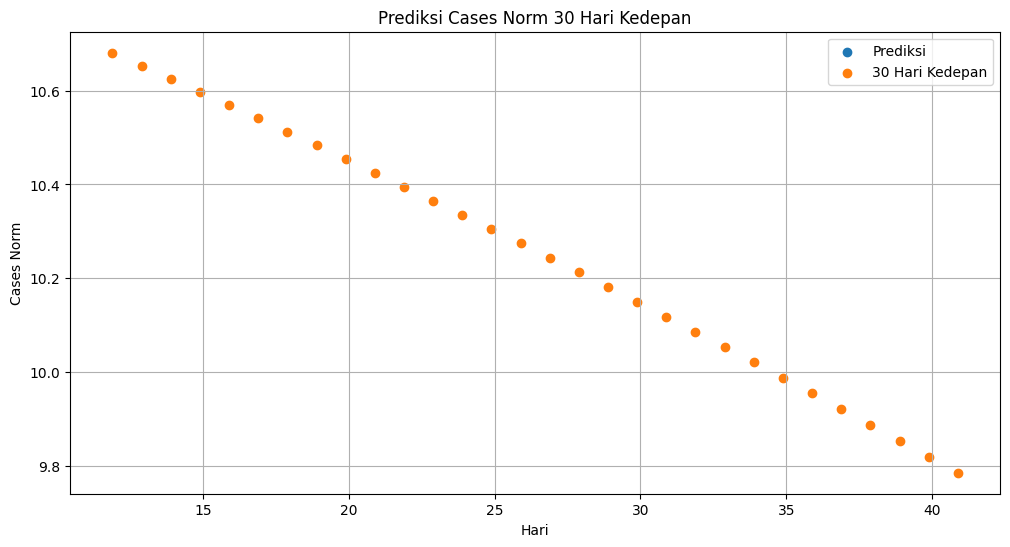

In [ ]:
#Disini kita akan melakukan plot grafik predict_date = x dan predict case = y
#Jangan lupa import matplotlib pada sel library/package
days_future = np.arange(max(predict_cases) + 1, max(predict_cases) + 31)
days_future_poly = poly_reg.fit_transform(days_future.reshape(-1, 1))
y_future = pol_reg.predict(days_future_poly)
plt.figure(figsize=(12, 6))
plt.scatter(predict_date, y_pred, label='Prediksi')
plt.scatter(days_future, y_future, label='30 Hari Kedepan')
plt.xlabel('Hari')
plt.ylabel('Cases Norm')
plt.title('Prediksi Cases Norm 30 Hari Kedepan')
plt.legend()
plt.grid(True)
plt.show()